# Replicating Qubit Results

This notebook attempts to replicate results from this [paper](https://www.science.org/doi/10.1126/sciadv.abl6698).

First problem: when specifying Ω, α, the values calculated by Transmon() are different and use the eigenenergies. Find a way to reverse-engineer the Hamiltonian so they are kept the same as specified.

In [1]:
# imports
import pandas as pd
import numpy as np

from transmon_code.superoperators import *
from transmon_code.transmon import Transmon
from transmon_code.optimise_X90 import *
from transmon_code.simulate import *
from transmon_code.helpers import *

In [2]:
# read data from csv fild
data = pd.read_csv("qubit_data.csv")

transmons = [Transmon(n_levels=8, Ω=data["Ω (MHz)"][i], α=data["α (MHz)"][i], RWA=False, t_decay=data["T1 (μs)"][i], t_dephase=data["T2 (μs)"][i], dt=0.0001) for i in range(len(data))]

# Transmon 0
transmons[0].X90_args = {'A': 130.21350659411283, 'Γ': 0.024, 'ω': transmons[0].Ω, 'A_DRAG': 0.0015316627683217086}

# Transmon 1
transmons[1].X90_args = {'A': 126.17513518457064, 'Γ': 0.024, 'ω': transmons[1].Ω, 'A_DRAG': 0.0009705877939832681}

# Transmon 2
transmons[2].X90_args = {'A': 130.41765009149555, 'Γ': 0.024, 'ω': transmons[2].Ω, 'A_DRAG': 0.001113488315910093}

# Transmon 3
transmons[3].X90_args = {'A': 125.73528740360433, 'Γ': 0.024, 'ω': transmons[3].Ω, 'A_DRAG': 0.0014322845326852605}

data

,Ω (MHz),α (MHz),T1 (μs),T2 (μs),EPG1,EPG2,EPG theoretical
0,3981,-199,106,101,0.000229,0.000164,0.000110
1,4045,-199,159,116,0.000146,0.000215,0.000094
2,4130,-198,179,128,0.000116,0.000131,0.000085
3,4192,-197,151,113,0.000223,0.000216,0.000097


Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274

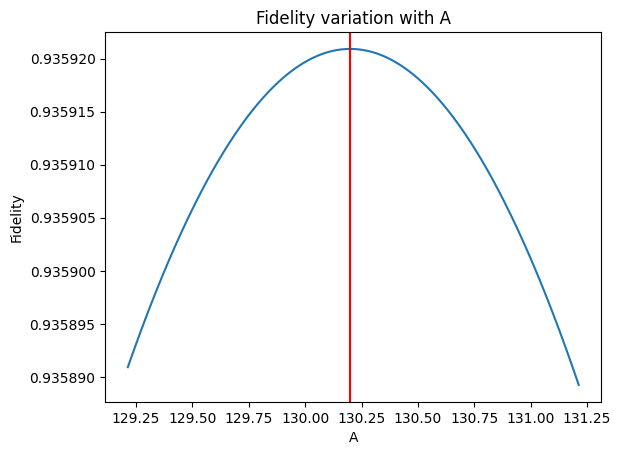

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 26

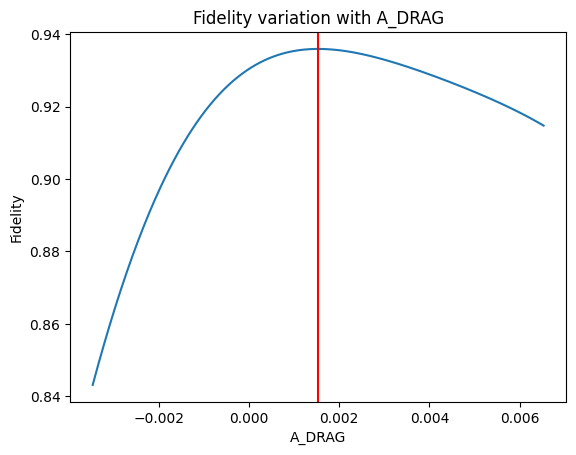

Optimal args:{'A': 130.19967452267184, 'Γ': 0.024, 'ω': 3969.9692309536913, 'A_DRAG': 0.0015311368432125395}
Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 24

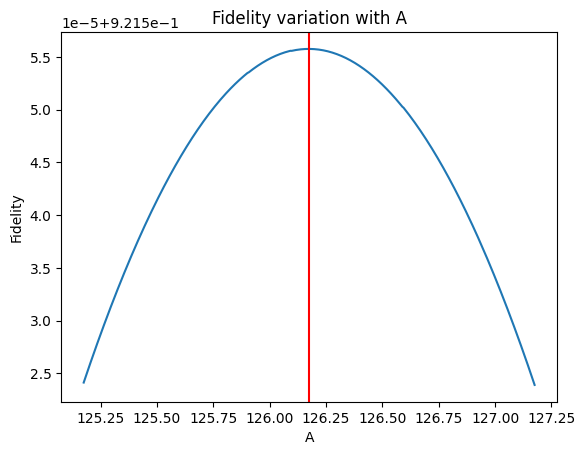

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 26

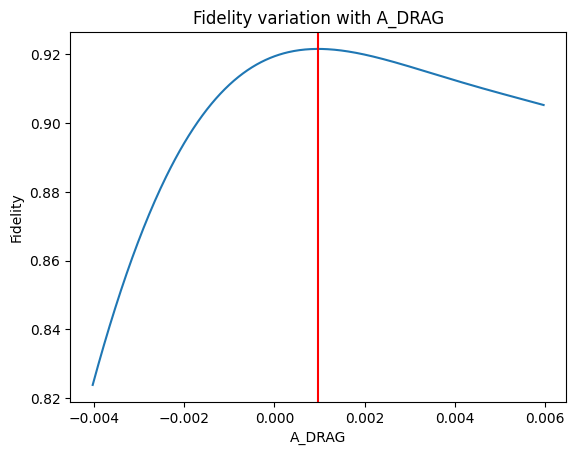

Optimal args:{'A': 126.17330734455783, 'Γ': 0.024, 'ω': 4034.1657951330626, 'A_DRAG': 0.0009707710869245798}
Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 24

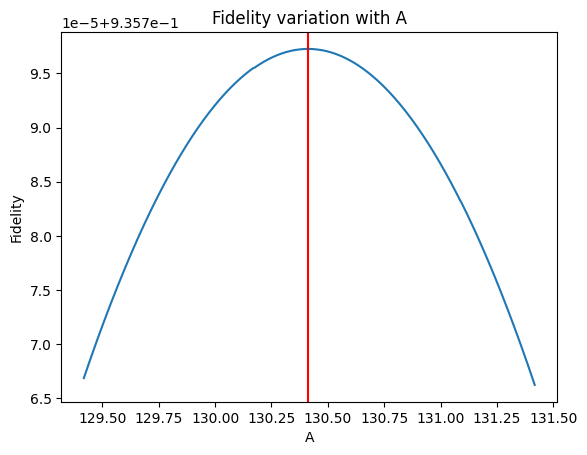

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 26

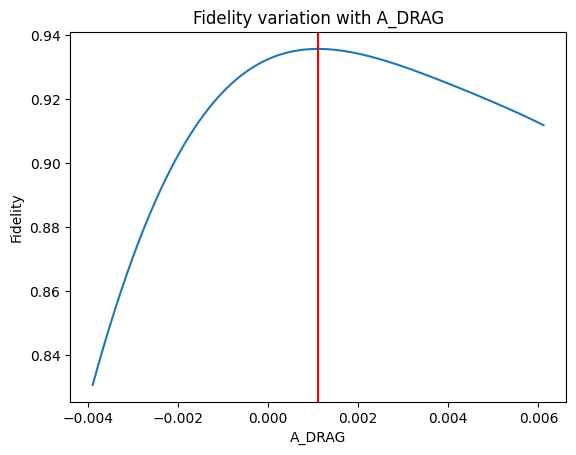

Optimal args:{'A': 130.41234230007106, 'Γ': 0.024, 'ω': 4119.528645695117, 'A_DRAG': 0.0011131373037056153}
Optimising A
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247

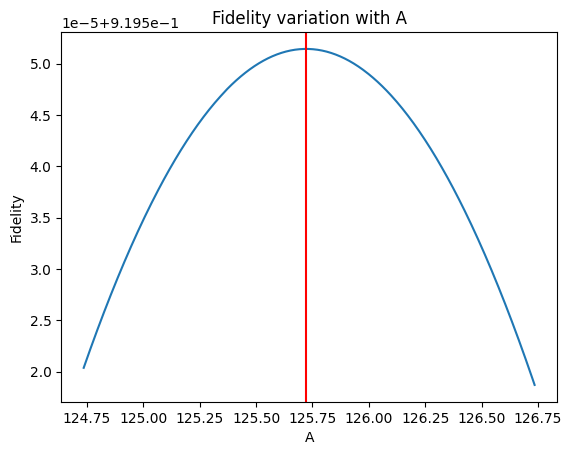

Keeping Γ constant.
Optimising A_DRAG
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 26

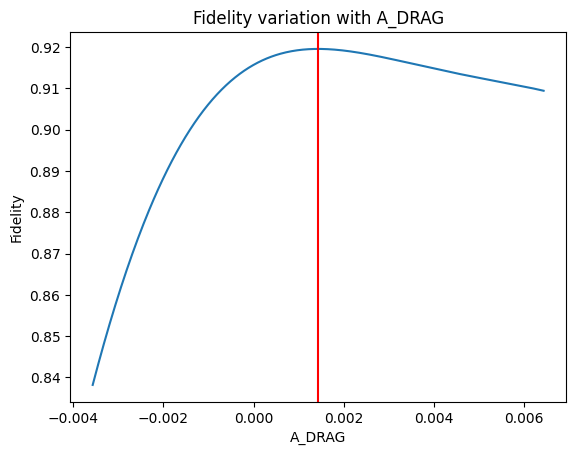

Optimal args:{'A': 125.72189193327314, 'Γ': 0.024, 'ω': 4181.811819686626, 'A_DRAG': 0.0014313122966304866}
Transmon 0
{'A': 130.19967452267184, 'Γ': 0.024, 'ω': 3969.9692309536913, 'A_DRAG': 0.0015311368432125395}

Transmon 1
{'A': 126.17330734455783, 'Γ': 0.024, 'ω': 4034.1657951330626, 'A_DRAG': 0.0009707710869245798}

Transmon 2
{'A': 130.41234230007106, 'Γ': 0.024, 'ω': 4119.528645695117, 'A_DRAG': 0.0011131373037056153}

Transmon 3
{'A': 125.72189193327314, 'Γ': 0.024, 'ω': 4181.811819686626, 'A_DRAG': 0.0014313122966304866}



In [3]:
semiranges = {"A":1, "Γ":0, "A_DRAG":0.005}

for qubit_no in range(4):

    t = np.arange(0, 0.25, transmons[qubit_no].dt)

    transmons[qubit_no].t_decay = np.inf
    transmons[qubit_no].t_dephase = np.inf

    # apparently DRAG parameter is 0.5/α to maximise avg gate fidelity and 1/α to minimise leakage errors?

    transmons[qubit_no].X90_args = create_X90_pulse(t, transmons[qubit_no], transmons[qubit_no].X90_args, semiranges=semiranges, plot=True, N=400) 

for i,v in enumerate(transmons):
    print("Transmon "+str(i))
    print(v.X90_args)
    print()

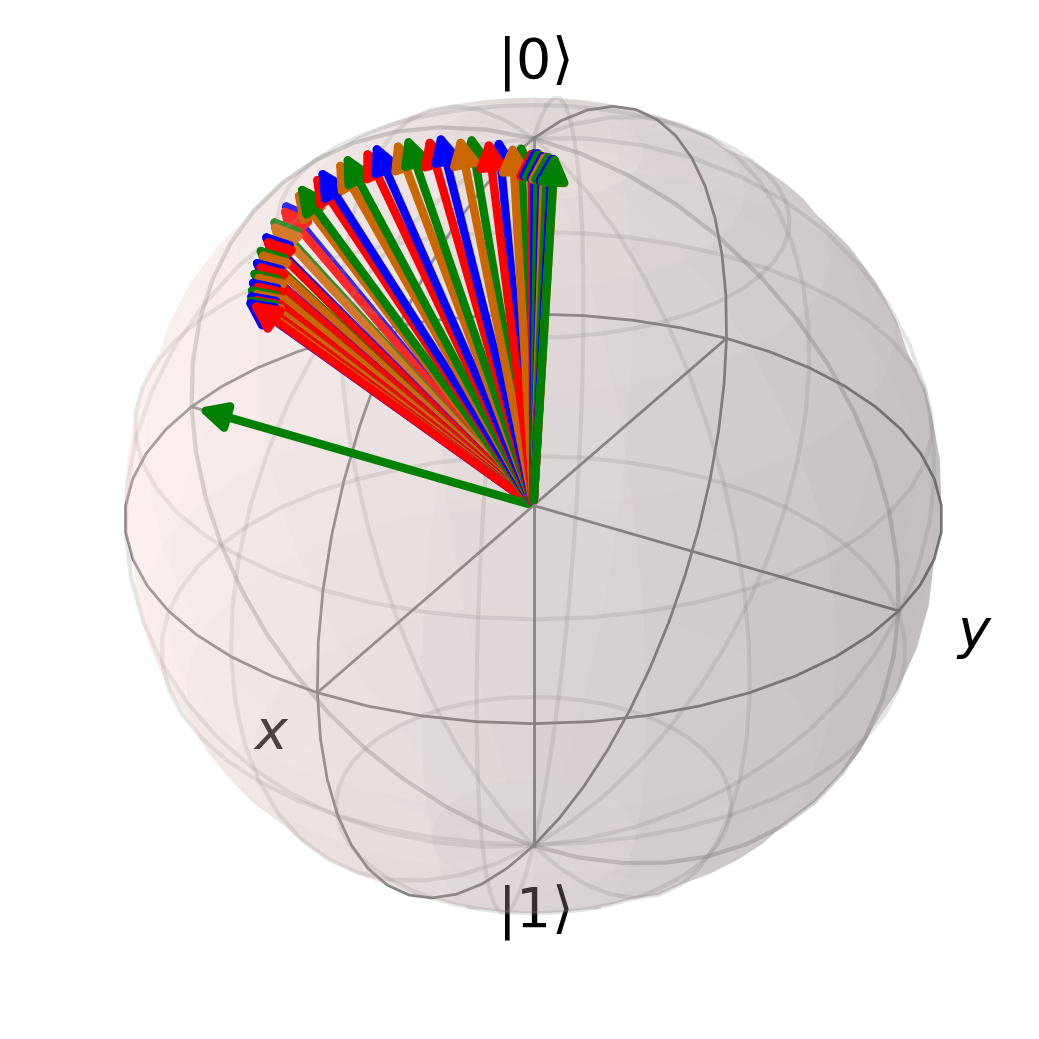

Fidelity:                    0.9358851945490575
Total measured error:        0.0641148054509425
Leakage error:               0.037730767175790755
Theoretical coherence error: 0.00011693008809143812
Error accounted for:         0.03784769726388219
Error unaccounted for:       0.02626710818706031


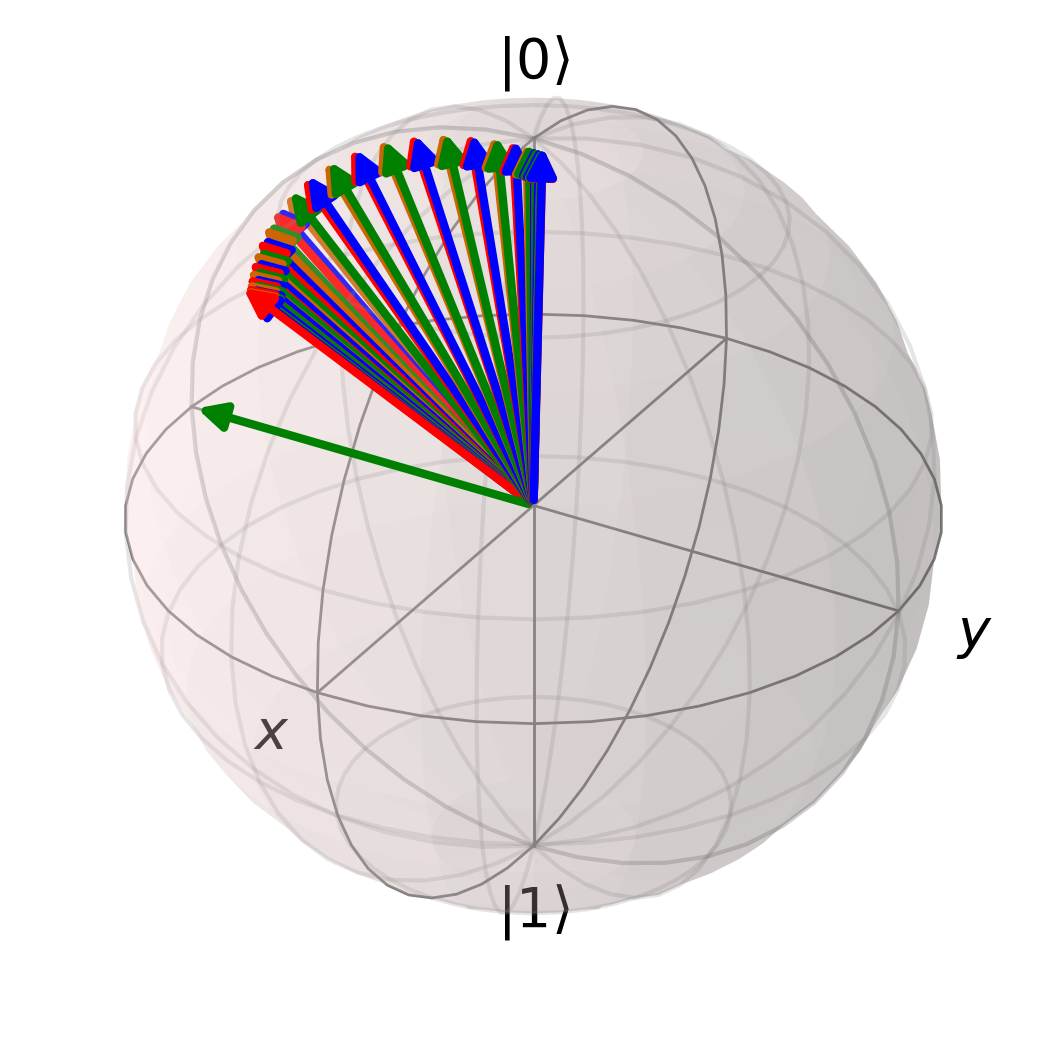

Fidelity:                    0.9215295583471351
Total measured error:        0.07847044165286488
Leakage error:               0.04694142034212559
Theoretical coherence error: 9.411371751040971e-05
Error accounted for:         0.047035534059636
Error unaccounted for:       0.03143490759322888


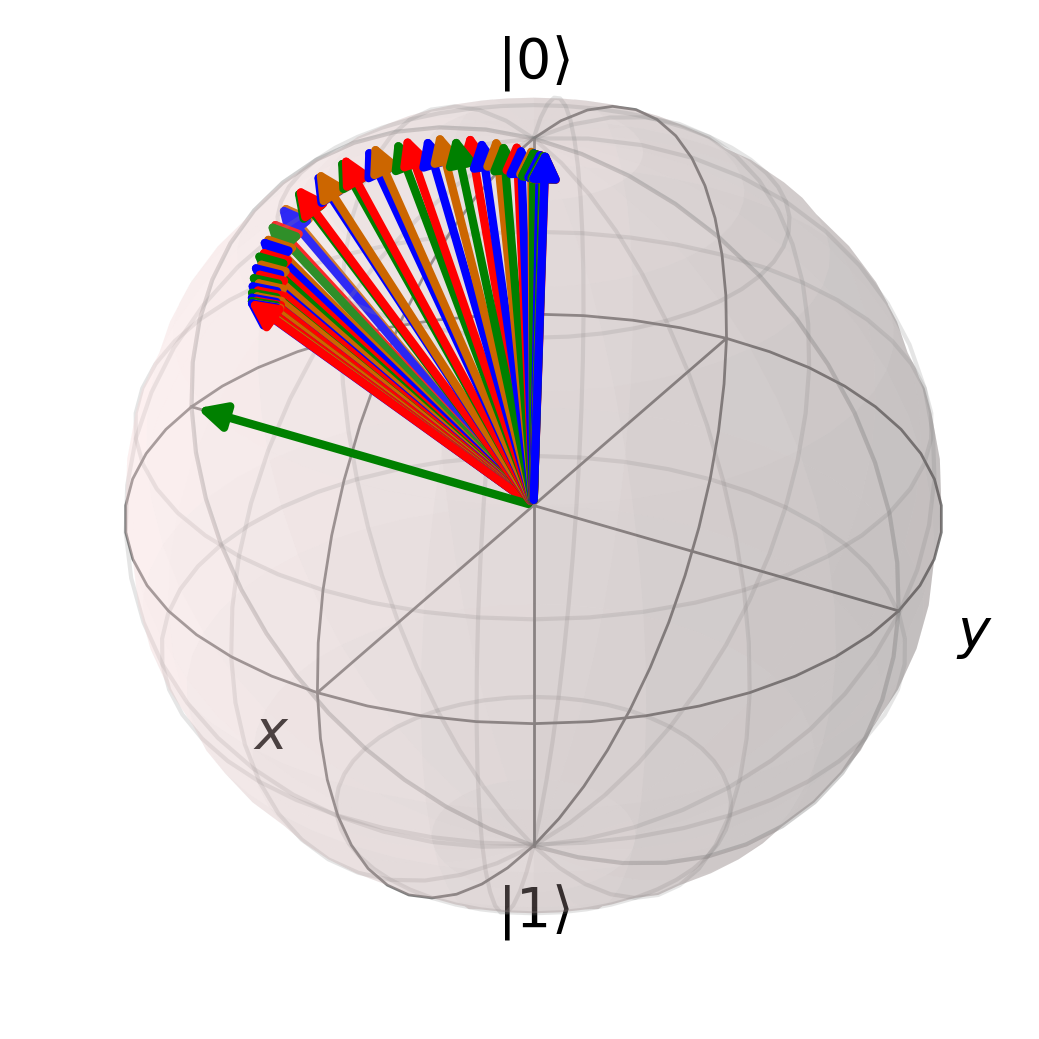

Fidelity:                    0.9357702770338236
Total measured error:        0.06422972296617635
Leakage error:               0.0375814014095814
Theoretical coherence error: 8.483901169265007e-05
Error accounted for:         0.03766624042127405
Error unaccounted for:       0.026563482544902303


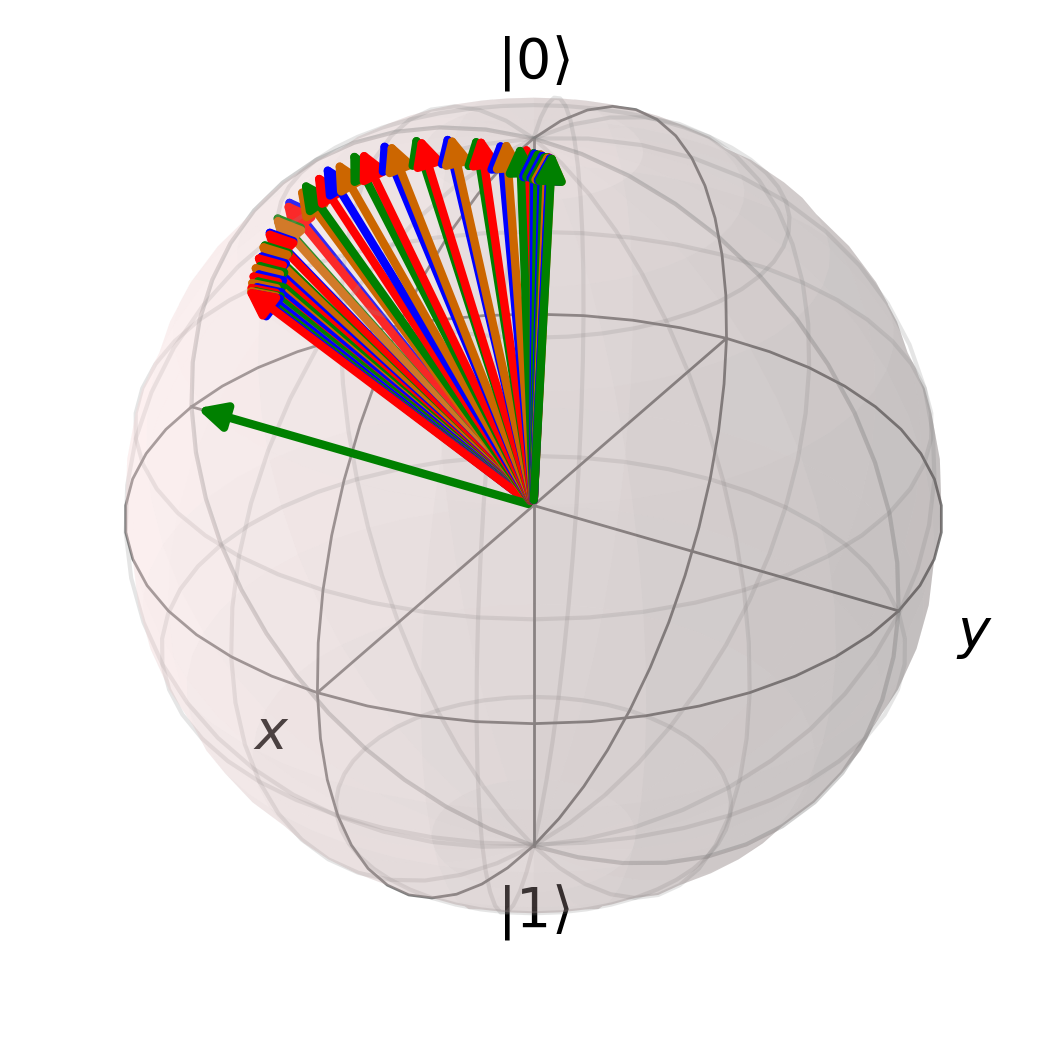

Fidelity:                    0.9195287569074211
Total measured error:        0.08047124309257891
Leakage error:               0.04811986548674168
Theoretical coherence error: 9.727690366689856e-05
Error accounted for:         0.04821714239040858
Error unaccounted for:       0.03225410070217034


In [4]:
# simulates pulse and breaks down error
%matplotlib qt

for qubit_no in range(4):

    transmons[qubit_no].t_decay = data["T1 (μs)"][qubit_no]
    transmons[qubit_no].t_dephase = data["T2 (μs)"][qubit_no]

    targ = (basis(transmons[qubit_no].n_levels, 0) - 1j*basis(transmons[qubit_no].n_levels, 1)).unit()

    res, f = simulate(transmons[qubit_no], transmons[qubit_no].X90_args, target=targ, plot=True)

    break_down_errors(transmons[qubit_no], transmons[qubit_no].X90_args, res[-1], f)